In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 46.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(action='ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
try:
    import pycaret
except:
    !pip install pycaret

try:
    import missingno
except:
    !pip install missingno

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.9 MB/s eta

In [ ]:
def plot_histgram(feature):
    fig = px.histogram(heart_df, x=feature,
                       color="HeartDisease",
                       marginal="box",
                       barmode ="overlay",
                       histnorm ='density'
                      )
    fig.update_layout(
        title_font_color="white",
        legend_title_font_color="yellow",
        title={
            'text': feature+" histogram",
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        paper_bgcolor="black",
        plot_bgcolor='black',
        font_color="white"
    )
    fig.show()

In [ ]:
sns.set_theme()
sns.set_palette(sns.color_palette('rocket', 3))
plt.show()

<hr style="border: solid 3px white;">


# EDA

In [ ]:
heart_df = pd.read_csv("heart_Salem.csv")
heart_df.head().T.style.set_properties(**{'background-color': 'grey',
                           'color': 'white',
                           'border-color': 'white'})

,0,1,2,3,4
Age,40,49,37,48,54
Sex,M,F,M,F,M
ChestPainType,ATA,NAP,ATA,ASY,NAP
RestingBP,140,160,130,138,150
Cholesterol,289,180,283,214,195
FastingBS,0,0,0,0,0
RestingECG,Normal,Normal,ST,Normal,Normal
MaxHR,172,156,98,108,122
ExerciseAngina,N,N,N,Y,N
Oldpeak,0.000000,1.000000,0.000000,1.500000,0.000000


In [ ]:
heart_df.head()

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB



# Checking Missing Values

<Axes: >

<Figure size 2500x1000 with 2 Axes>

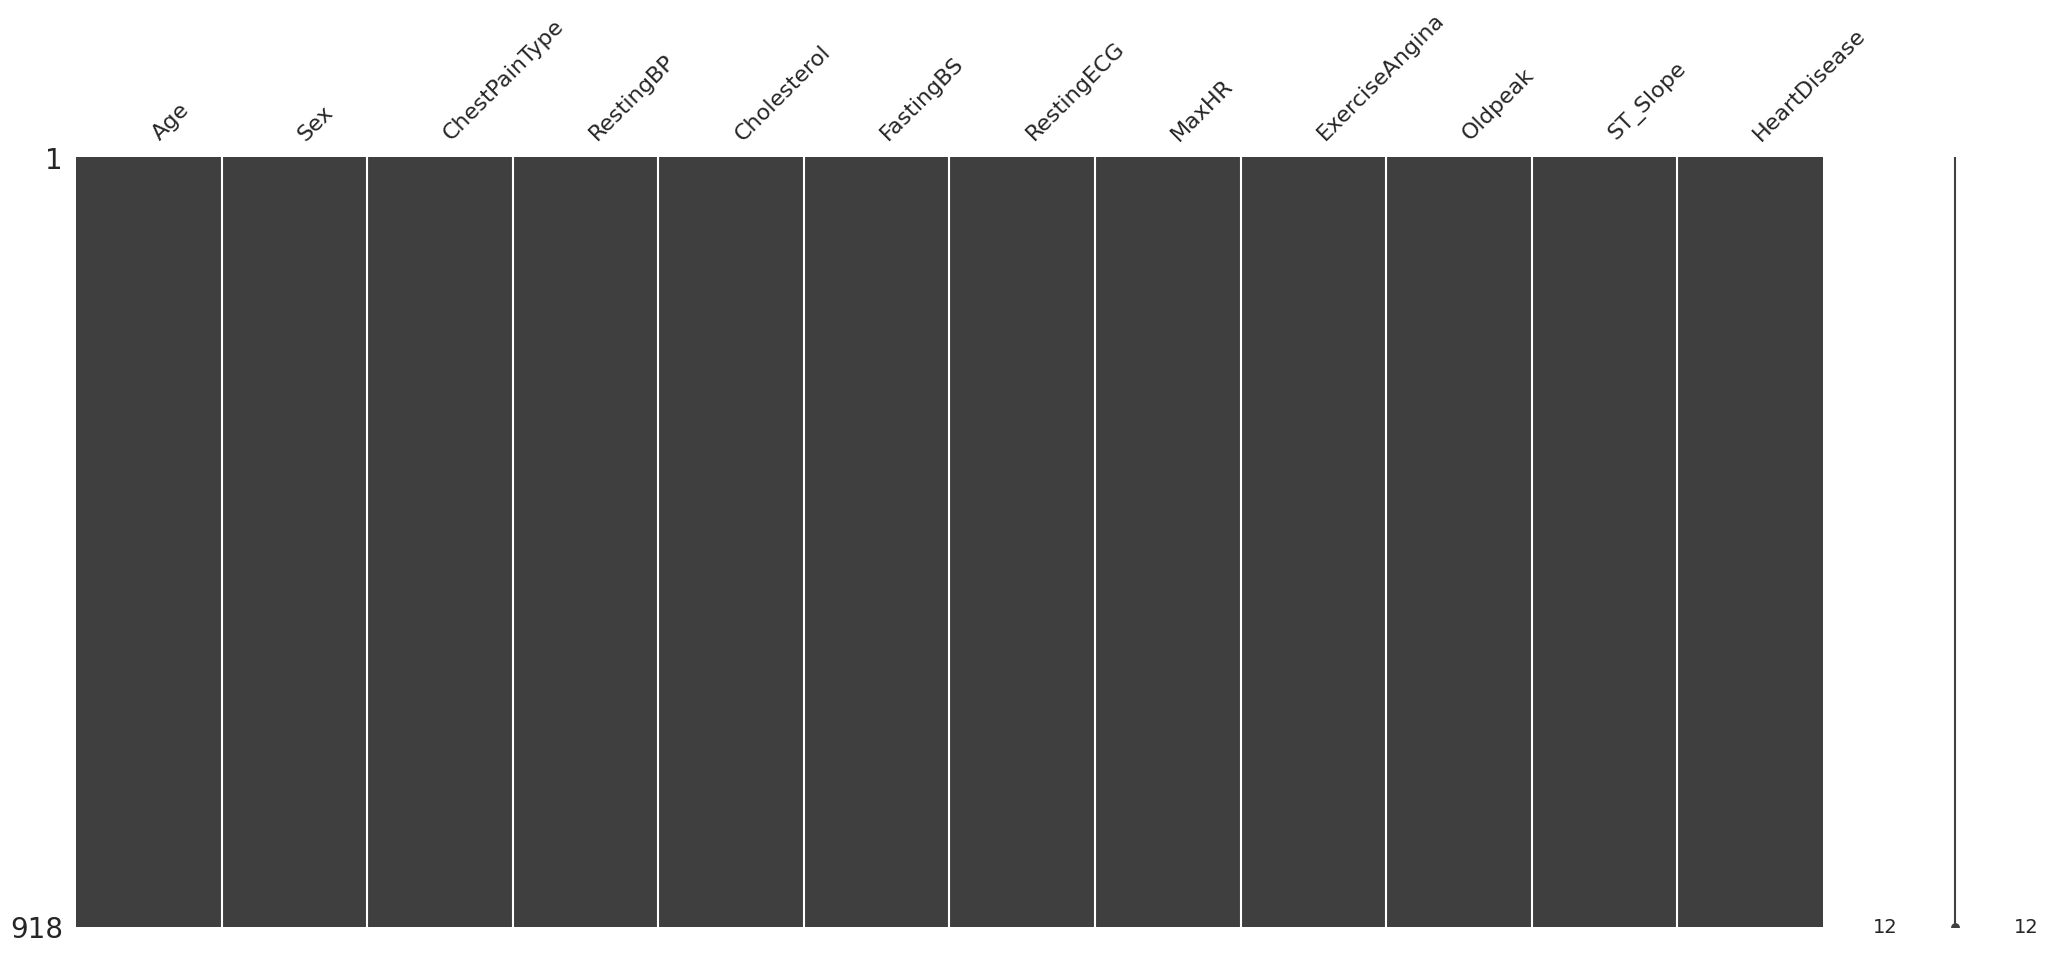

In [ ]:
import missingno as msno
msno.matrix(heart_df)

<span style="color:Blue"> **Observation:**
    
OK. There is no missing values!



**Features:**

Age: age of the patient [years];

Sex: sex of the patient [M: Male, F: Female];

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina;

NAP: Non-Anginal Pain, ASY: Asymptomatic];

RestingBP: resting blood pressure [mm Hg];

Cholesterol: serum cholesterol [mm/dl];

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise];

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ;ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria];

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202];

ExerciseAngina: exercise-induced angina [Y: Yes, N: No];

Oldpeak: oldpeak = ST [Numeric value measured in depression];

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping];

HeartDisease: output class [1: heart disease, 0: Normal].

# Checking the data type of features

In [ ]:
display(heart_df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Figure size 800x600 with 1 Axes>

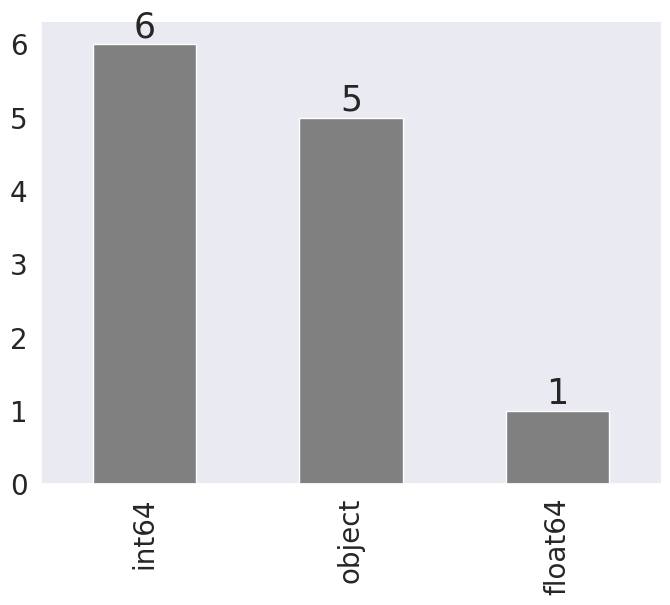

In [ ]:
plt.figure(figsize = (8,6))
ax = heart_df.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20,color='grey')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 0.1, height, ha = 'center', size = 25)
sns.despine()

<span style="color:Blue"> **Observation:**
* A man was diagnosed with a lot.
* Men were diagnosed with heart disease more than women.

-------------------------------------------
# Checking Target Imbalance

In [ ]:
colors = ['gold', 'mediumturquoise']
labels = ['Normal','Heart Disease']
values = heart_df['HeartDisease'].value_counts()/heart_df['HeartDisease'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Heart Disease",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

<span style="color:Blue"> **Observation:**
    
**OK! Target is balanced!**

<hr style="border: solid 3px white;">


# Categorical Features

![](https://miro.medium.com/max/1400/1*wYbTRM0dgnRzutwZq63xCg.png)



Picture Credit: https://miro.medium.com

In [ ]:
cat_cols = [cname for cname in heart_df.loc[:,:'ST_Slope'].columns if
                    heart_df[cname].dtype == "object"]

# Select numerical columns
int_cols = [cname for cname in heart_df.loc[:,:'ST_Slope'].columns if
                heart_df[cname].dtype in ['int64']]
float_cols = [cname for cname in heart_df.loc[:,:'ST_Slope'].columns if
                heart_df[cname].dtype in ['float64']]

num_cols = int_cols + float_cols

<hr style="border: solid 3px white;">

## Sex

* The person's sex (1 = male, 0 = female)

<Figure size 1200x600 with 1 Axes>

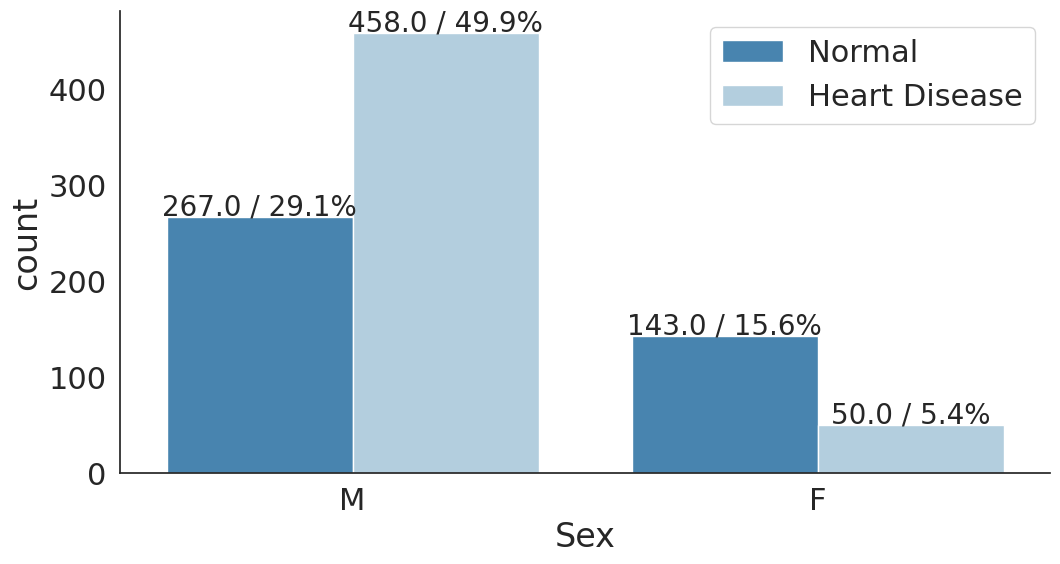

In [ ]:
total_cnt = heart_df['HeartDisease'].count()
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=heart_df, x='Sex',hue='HeartDisease',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

<span style="color:Blue"> **Observation:**
* A man was diagnosed with a lot.
* Men were diagnosed with heart disease more than women.

<hr style="border: solid 3px white;">

## ChestPainType (Chest Pain Type)

We distinguish the different types between :
* TA: typical angina;
* ATA: atypical angina;
* NAP: non-anginal pain;
* ASY: asymptomatic.

<Figure size 2000x600 with 1 Axes>

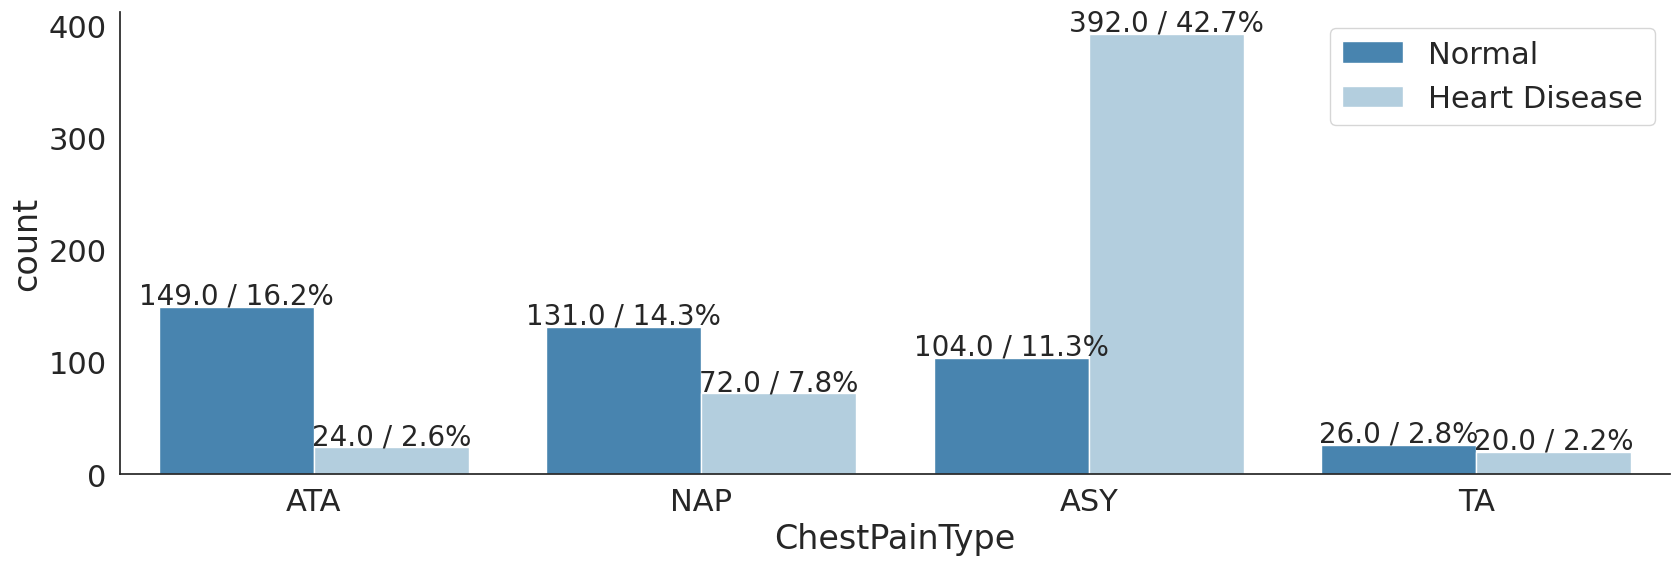

In [ ]:
total_cnt = heart_df['HeartDisease'].count()
plt.figure(figsize=(20,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=heart_df, x='ChestPainType',hue='HeartDisease',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

<span style="color:Blue"> **Observation:**
* Even asymptomatic patients are often diagnosed with heart disease!

<hr style="border: solid 3px white;">

## RestingECG (Resting Electrocardiogram Results)

![](https://www.assignmentpoint.com/wp-content/uploads/2015/10/electrocardiography.jpg)

Picture Credit: https://www.assignmentpoint.com



Resting electrocardiographic measurement:

* Normal: Normal;
* ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV);
* LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria.

Ref: https://www.nhs.uk/conditions/electrocardiogram

<Figure size 1600x600 with 1 Axes>

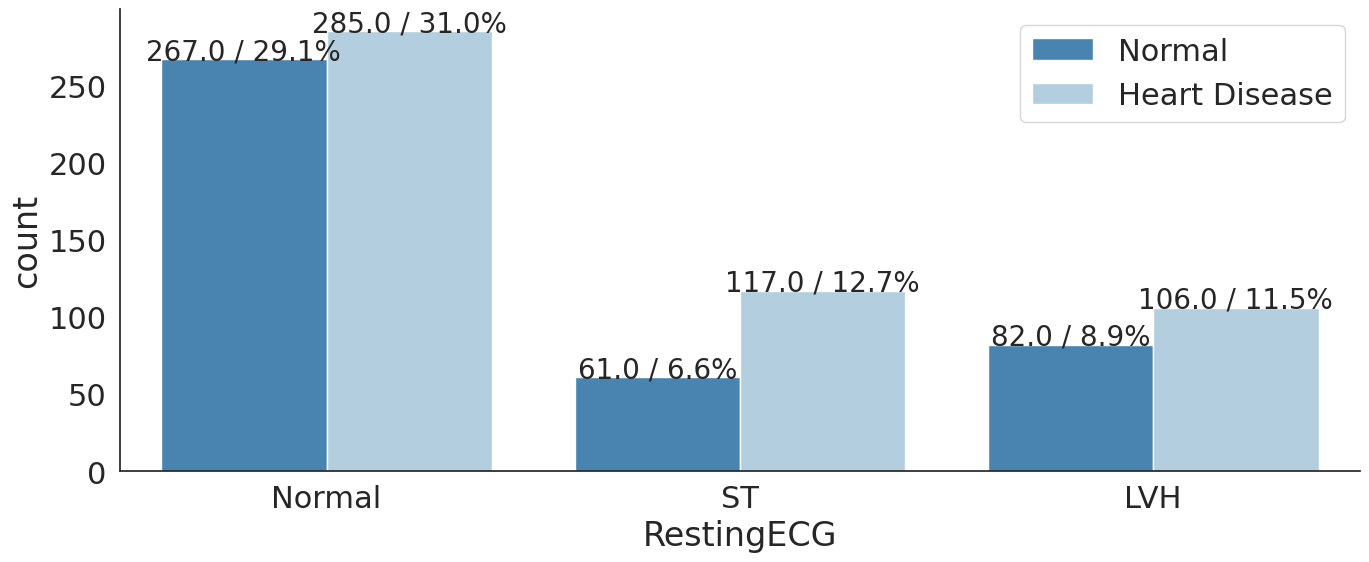

In [ ]:
total_cnt = heart_df['HeartDisease'].count()
plt.figure(figsize=(16,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=heart_df, x='RestingECG',hue='HeartDisease',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 5, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

<hr style="border: solid 3px white;">

## ExerciseAngina  (Exercise Induced Angina)



![](http://res.heraldm.com/content/image/2014/09/25/20140925001325_0.jpg)

Picture Credit: http://res.heraldm.com

Exercise-Induced Angina:
* Y: Yes;
* N: No.

<Figure size 1200x600 with 1 Axes>

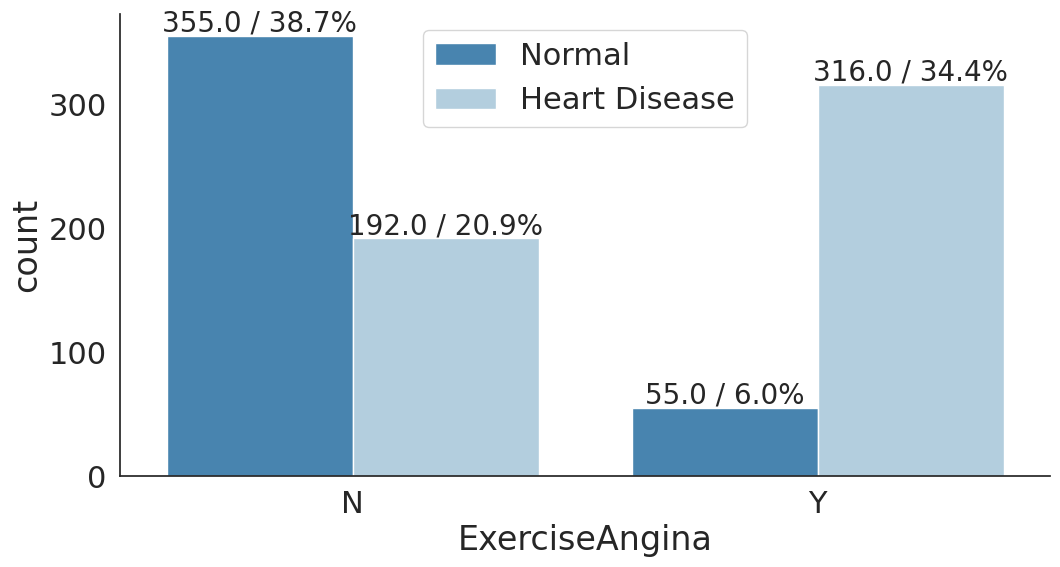

In [ ]:
total_cnt = heart_df['HeartDisease'].count()
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=heart_df, x='ExerciseAngina',hue='HeartDisease',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

<span style="color:Blue"> **Observation:**
* Heart disease is often diagnosed when exercise-induced angina is present.

<hr style="border: solid 3px white;">

## ST_Slope (the slope of the peak exercise ST segment)

![](https://litfl.com/wp-content/uploads/2018/10/ST-segment-depression-upsloping-downsloping-horizontal.png)

Picture Credit: https://litfl.com/wp-content

The slope of the peak exercise ST segment:
* Up: upsloping;
* Flat: flat;
* Down: downsloping.

<Figure size 1500x600 with 1 Axes>

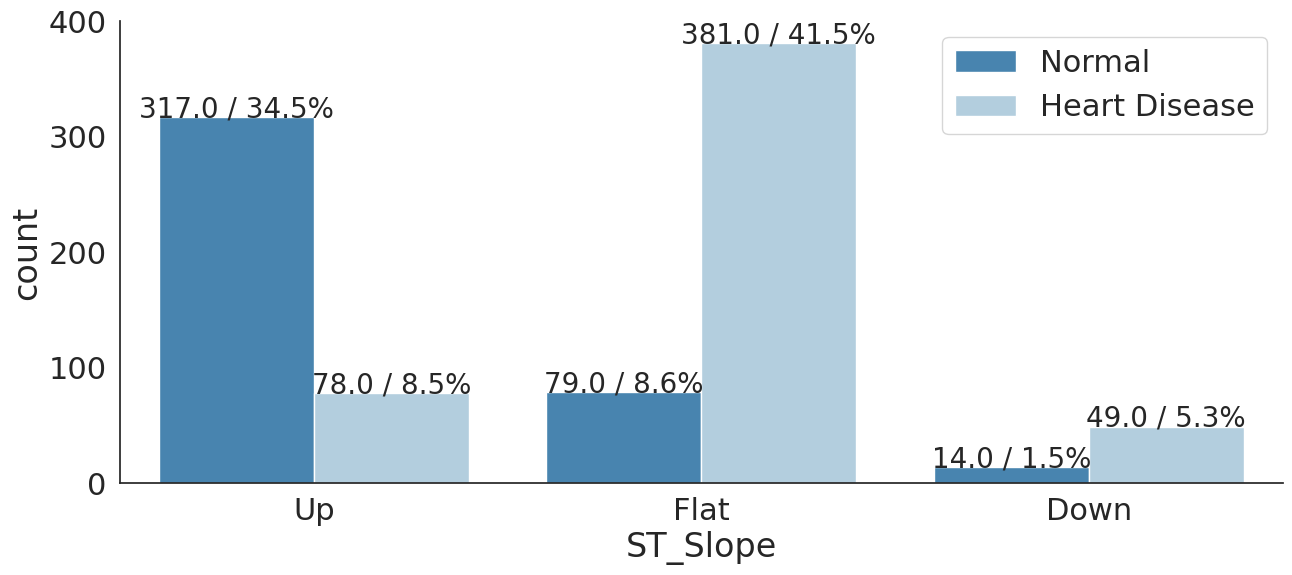

In [ ]:
total_cnt = heart_df['HeartDisease'].count()
plt.figure(figsize=(15,6))
sns.set(font_scale = 2)
plt.subplots_adjust(wspace=0.3)
sns.set_style("white")
ax = sns.countplot(data=heart_df, x='ST_Slope',hue='HeartDisease',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 7, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

<span style="color:Blue"> **Observation:**
* When ST_Slope is Up, it is often judged as Normal.
* If ST_Slope is flat/down, it is often judged as heart disease.

<hr style="border: solid 3px white;">

## FastingBS
fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

![](https://bizimages.withfloats.com/actual/5cf01dd2a5a2e6000120f19f.jpg)

Picture Credit: https://bizimages.withfloats.com

<Figure size 1200x600 with 1 Axes>

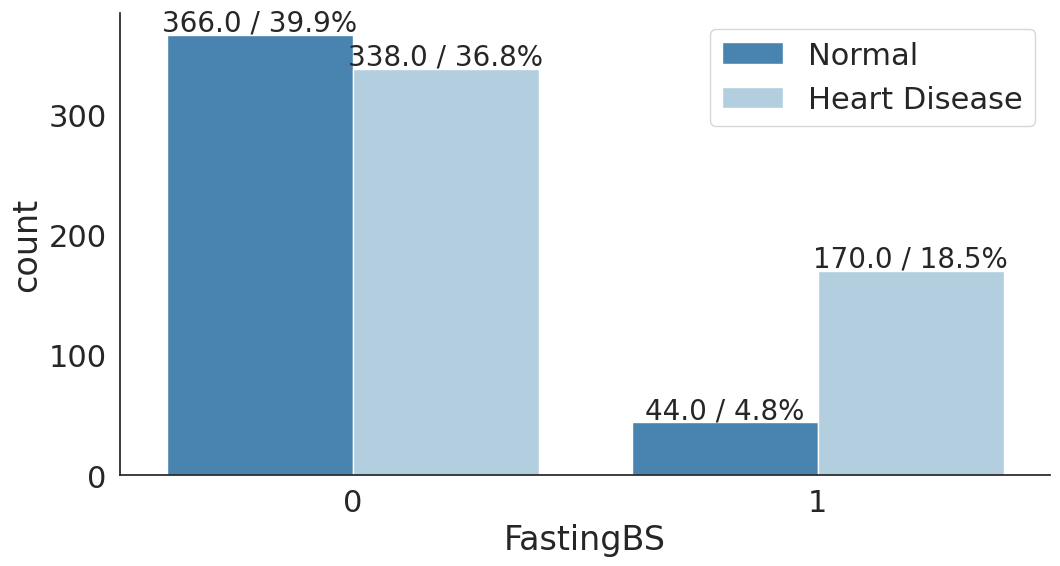

In [ ]:
total_cnt = heart_df['HeartDisease'].count()
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=heart_df, x='FastingBS',hue='HeartDisease',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

<span style="color:Blue"> **Observation:**
* When ST_Slope is Up, it is often judged as Normal.
* If ST_Slope is flat/down, it is often judged as heart disease.

In [ ]:
num_cols.remove("FastingBS")

<hr style="border: solid 3px white;">


# Numerical Features

![](https://static-assets.codecademy.com/Courses/Hypothesis-Testing/Intro_to_variable_types_4.png)

Picture Credit: https://t3.ftcdn.net

In [ ]:
def display_stat(feature):
    mean = heart_df[feature].mean()
    std = heart_df[feature].std()
    skew = heart_df[feature].skew()
    kurtosis = heart_df[feature].kurtosis()
    print('mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}, kurtosis: {3:.4f} '.format(mean, std, skew, kurtosis))

<hr style="border: solid 3px white;">

## Age

In [ ]:
plot_histgram('Age')
display_stat('Age')


mean: 53.5109, std: 9.4326, skew: -0.1959, kurtosis: -0.3861 


<span style="color:Blue"> **Observation:**
* The median of the age of people judged for heart disease is 57 years old, which is larger than the median value of normal people.

<hr style="border: solid 3px white;">

## RestingBP ( resting blood pressure [mm Hg] )

![](https://health.clevelandclinic.org/wp-content/uploads/sites/3/2019/10/bloodPressurePreg-942572774-770x553.jpg)

Picture Credit: https://health.clevelandclinic.org

In [ ]:
plot_histgram('RestingBP')
display_stat('RestingBP')


mean: 132.3965, std: 18.5142, skew: 0.1798, kurtosis: 3.2713 


<span style="color:Blue"> **Observation:**
    
In the figure above, there is a value of 0. If the blood pressure is 0, it is not actually possible, so it is likely to be judged as an outlier.

## Handling outlier

Let's change the outlier to the median value.

In [ ]:
heart_df['RestingBP'].replace(0, heart_df['RestingBP'].median(),inplace=True)

In [ ]:
plot_histgram('RestingBP')
display_stat('RestingBP')


mean: 132.5381, std: 17.9901, skew: 0.6080, kurtosis: 0.7962 


<span style="color:Blue"> **Observation:**
    
Outliers have been removed, and skewness and kurtosis are also stable.

<hr style="border: solid 3px white;">

## Cholesterol ( serum cholesterol [mm/dl] )

![](https://victorchang-cdn.imgix.net/assets/src/uploads/How-is-High-Cholesterol-Measured-Heart-Health-Check.png)

Picture Credit: https://victorchang-cdn.imgix.net

> Your total blood cholesterol is calculated by adding your HDL and LDL cholesterol levels, plus 20% of your triglyceride level.
>
> “Normal ranges” are less important than your overall cardiovascular risk. Like HDL and LDL cholesterol levels, your total blood cholesterol level should be considered in context with your other known risk factors.
>
> Your doctor can recommend treatment approaches accordingly.

Ref: https://www.heart.org/en/health-topics

In [ ]:
plot_histgram('Cholesterol')
display_stat('Cholesterol')


mean: 198.7996, std: 109.3841, skew: -0.6101, kurtosis: 0.1182 


<span style="color:Blue"> **Observation:**
    
In the figure above, there are values that are 0. If serum cholesterol is 0, it is not possible in practice, so it is likely to be judged as an outlier.

## Handling outlier

Let's change the outlier to the median value.

In [ ]:
heart_df['Cholesterol'].replace(0, heart_df['Cholesterol'].median(),inplace=True)

In [ ]:
plot_histgram('Cholesterol')
display_stat('Cholesterol')


mean: 240.5817, std: 53.9830, skew: 1.5374, kurtosis: 6.2441 


<span style="color:Blue"> **Observation:**
    
Outliers have been removed, and skewness and kurtosis are also stable.

<hr style="border: solid 3px white;">

## MaxHR ( maximum heart rate achieved [Numeric value between 60 and 202] )

![](https://i0.wp.com/www.healthyperformance.co.uk/wp-content/uploads/2020/02/max-heart-rate.png)

Picture Credit: https://i0.wp.com

In [ ]:
plot_histgram('MaxHR')
display_stat('MaxHR')


mean: 136.8094, std: 25.4603, skew: -0.1444, kurtosis: -0.4482 


<span style="color:Blue"> **Observation:**
    
Outliers are not observed, and the distribution of values seems reasonable.

<hr style="border: solid 3px white;">

## Oldpeak ( oldpeak = ST [Numeric value measured in depression] )

ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)

![](https://www.researchgate.net/profile/Chandrasekhar-Nataraj/publication/224830806/figure/fig1/AS:302793928790021@1449203106175/The-components-of-the-ECG-signal.png)

Picture Credit: https://www.researchgate.net

In [ ]:
plot_histgram('Oldpeak')
display_stat('Oldpeak')


mean: 0.8874, std: 1.0666, skew: 1.0229, kurtosis: 1.2031 


<span style="color:Blue"> **Observation:**
    
Without domain knowledge, it is difficult to determine the normal range of the value. If anyone knows the normal range for this value, please let me know.

<hr style="border: solid 3px white;">

# Encoding

In [ ]:
heart_df = pd.get_dummies(heart_df,drop_first=True)

<hr style="border: solid 3px white;">


# Checking Feature Importance

**Here we check feature importance in various ways.**

Knowing which features are important when judging heart disease from different features will help you make a decision. It will also be very helpful when explaining to people who have been diagnosed.

Text(0.5, 1.0, 'Correlation Plot')

<Figure size 2000x2000 with 2 Axes>

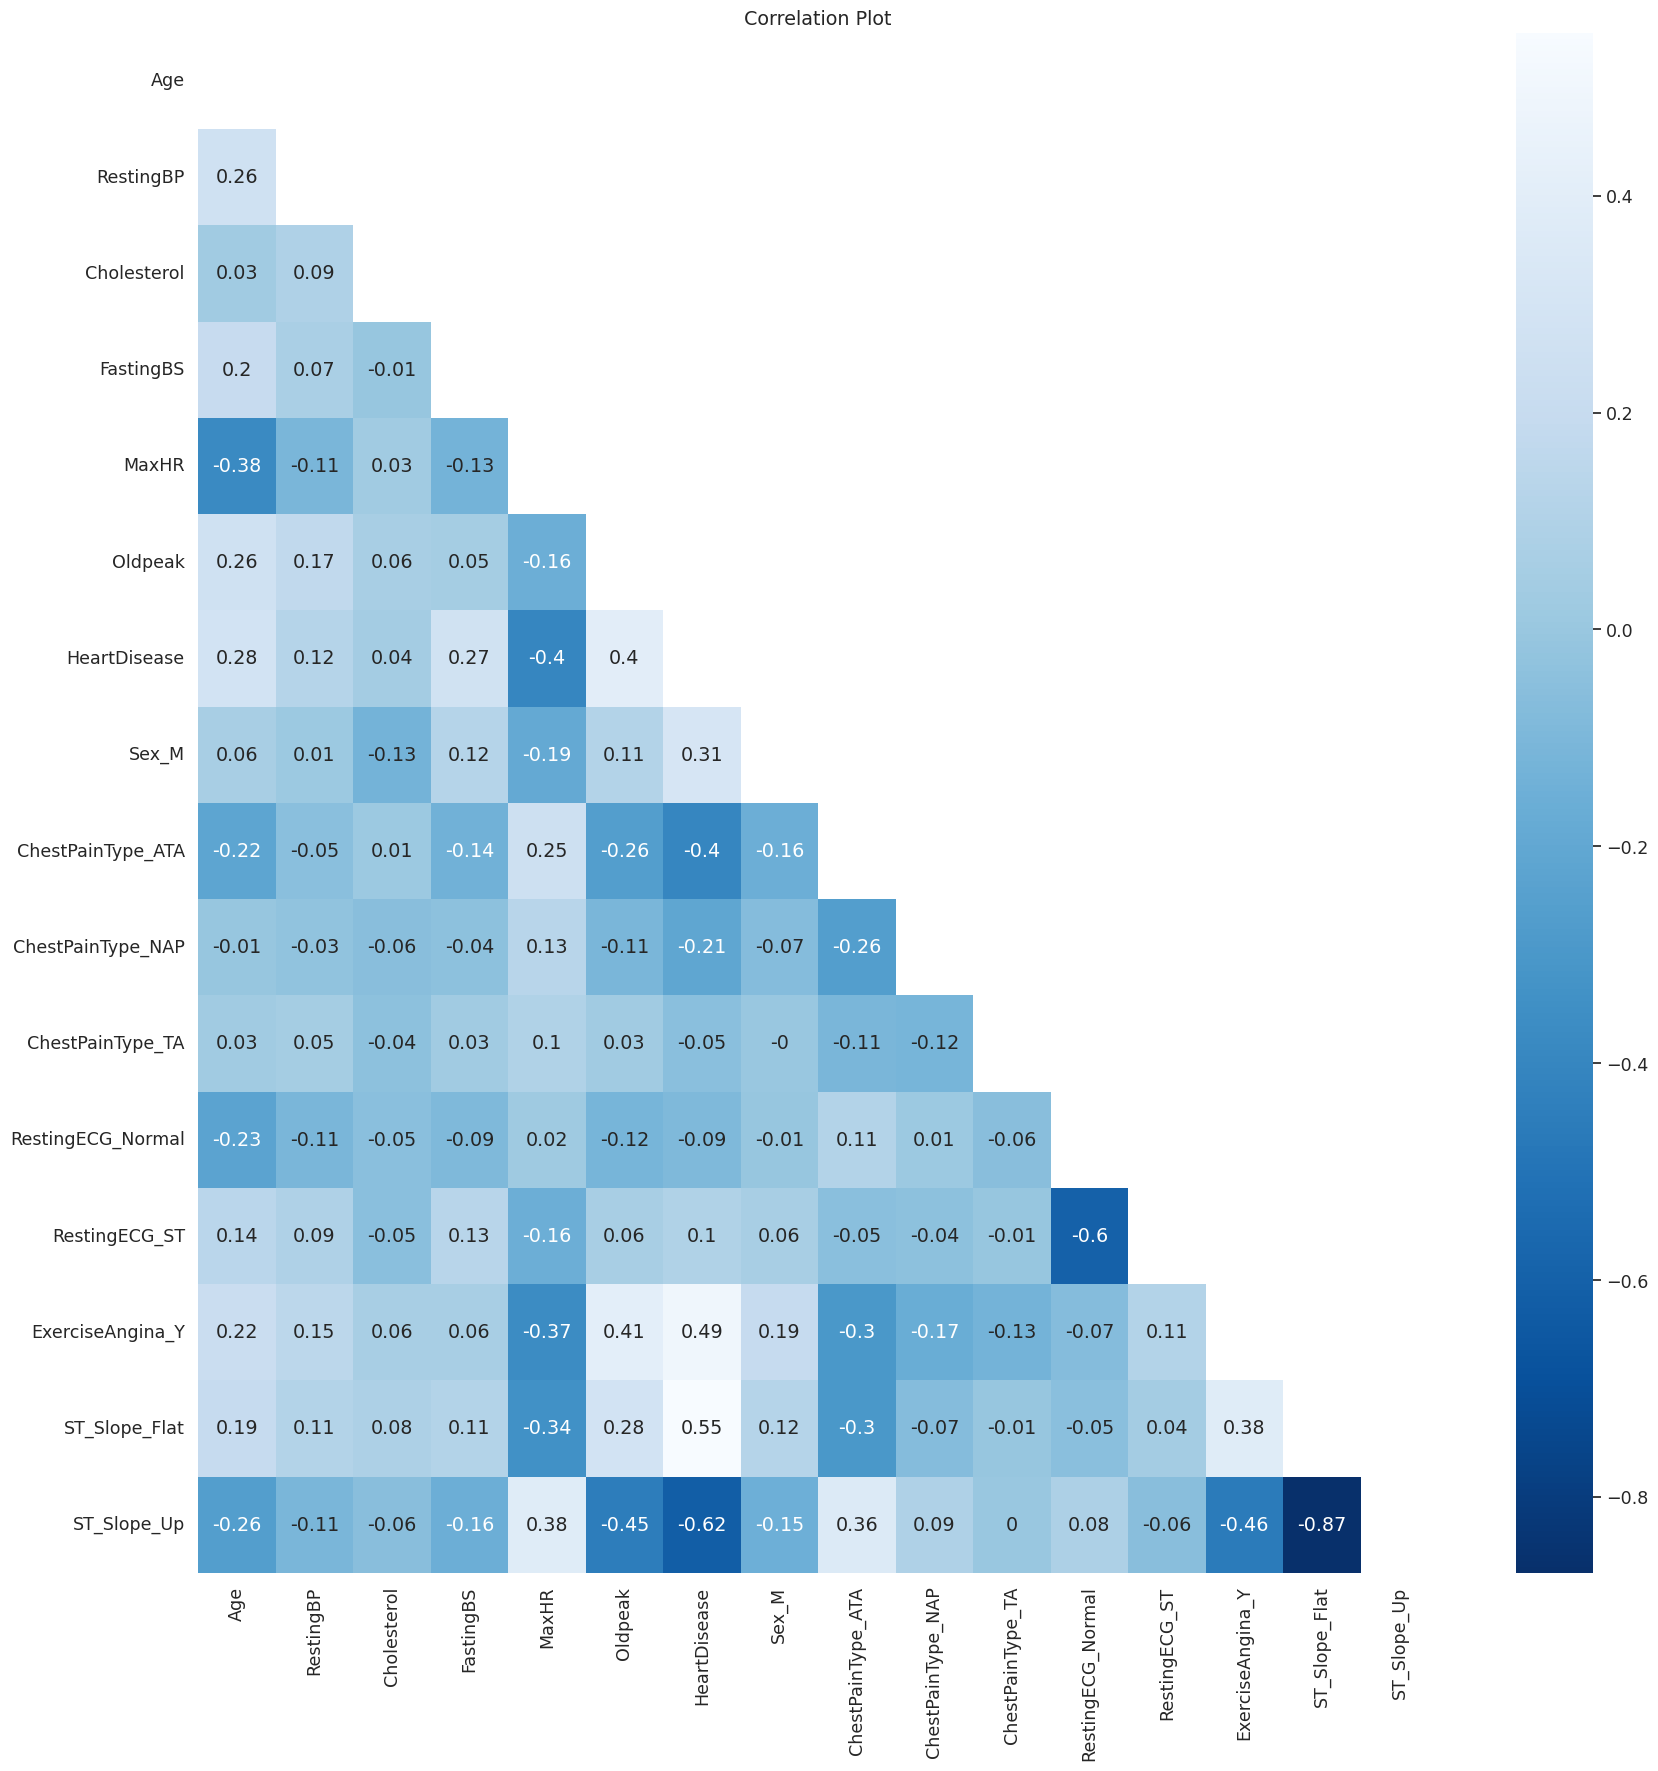

In [ ]:
corr=heart_df.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(20, 20))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='Blues_r',mask=mask,cbar=True)
plt.title('Correlation Plot')

<Figure size 1500x1500 with 1 Axes>

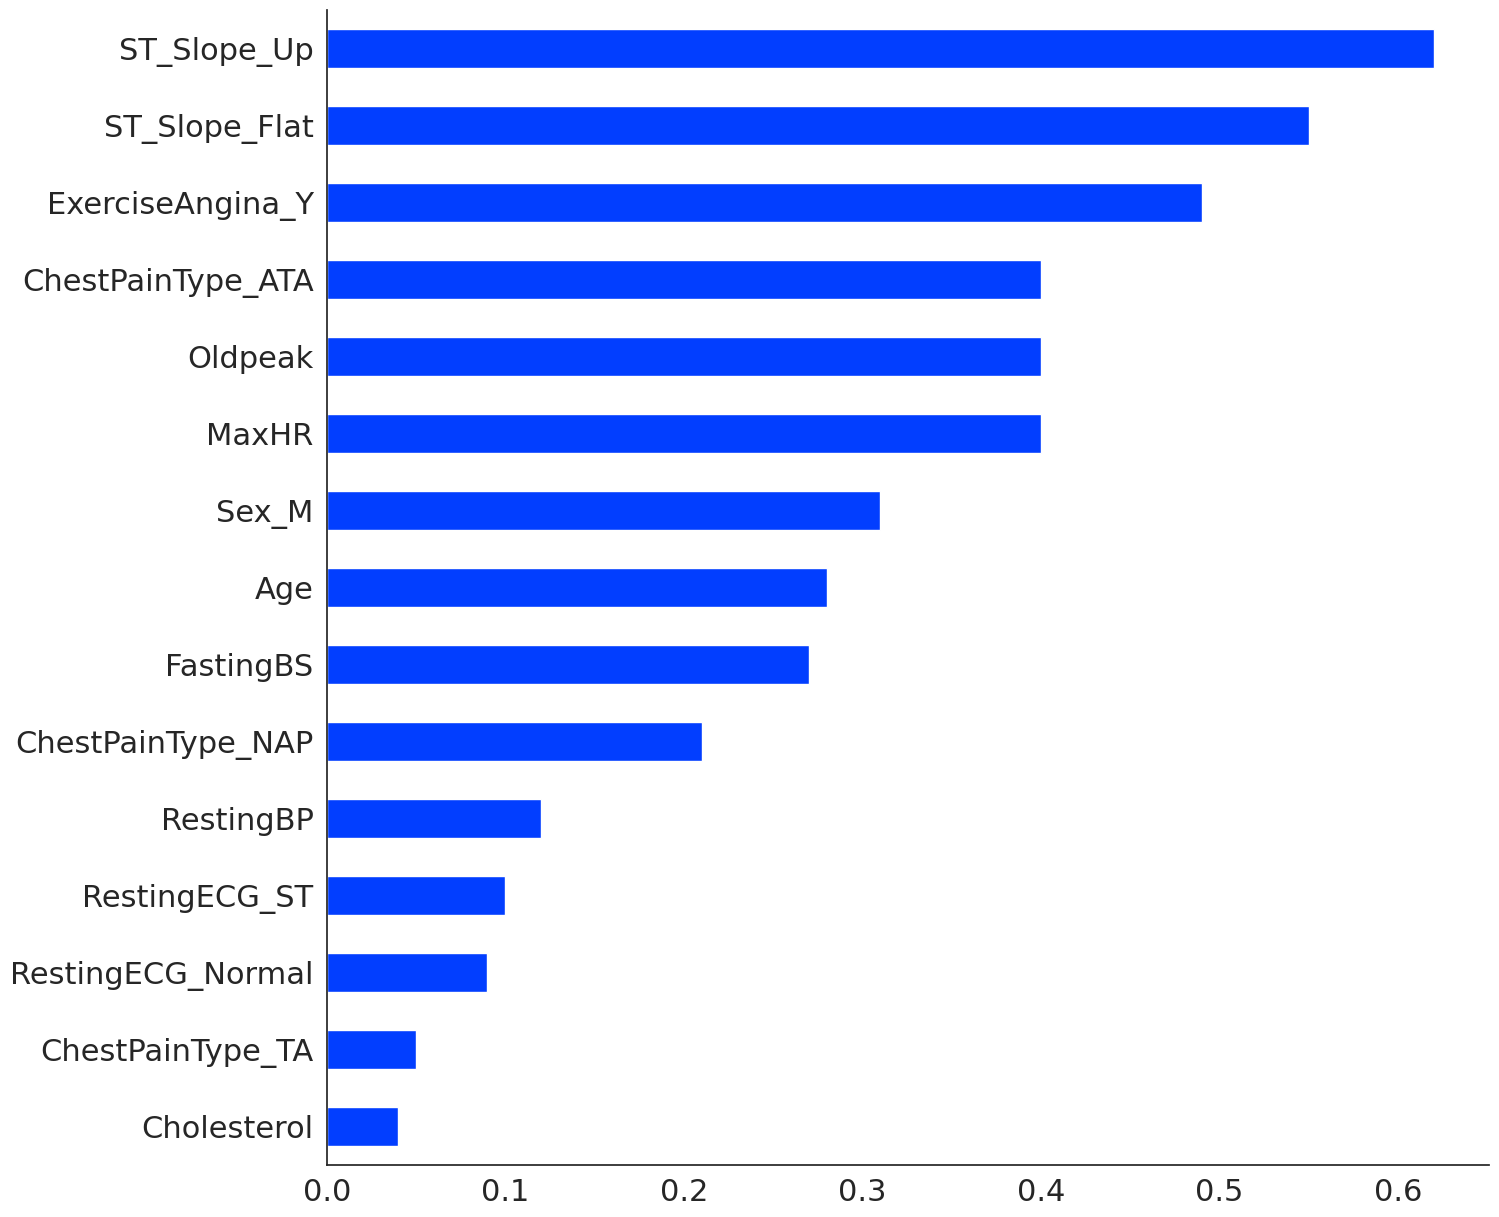

In [ ]:
sns.set(font_scale=2)
plt.figure(figsize=(15, 15))
sns.set_style("white")
sns.set_palette("bright")
abs(corr['HeartDisease']).sort_values()[:-1].plot.barh()
plt.gca().set_facecolor('#FFFFFF')
sns.despine()

<span style="color:Blue"> **Observation:**
* The correlation between heart disease and ST_Slope_Up and ST_Slope_Flat is high.

<hr style="border: solid 3px white;">

## Feature importance with partial dependence

> Partial dependence plots (PDP) show the dependence between the target response and a set of input features of interest, marginalizing over the values of all other input features (the ‘complement’ features). Intuitively, we can interpret the partial dependence as the expected target response as a function of the input features of interest

Ref: https://scikit-learn.org/stable/modules/partial_dependence.html#partial-dependence

In [ ]:
heart_df_copy = heart_df.copy()
X_train = heart_df_copy.drop('HeartDisease',axis=1)
y_train = heart_df_copy.pop('HeartDisease')

In [ ]:
all_cols = [cname for cname in X_train.columns]

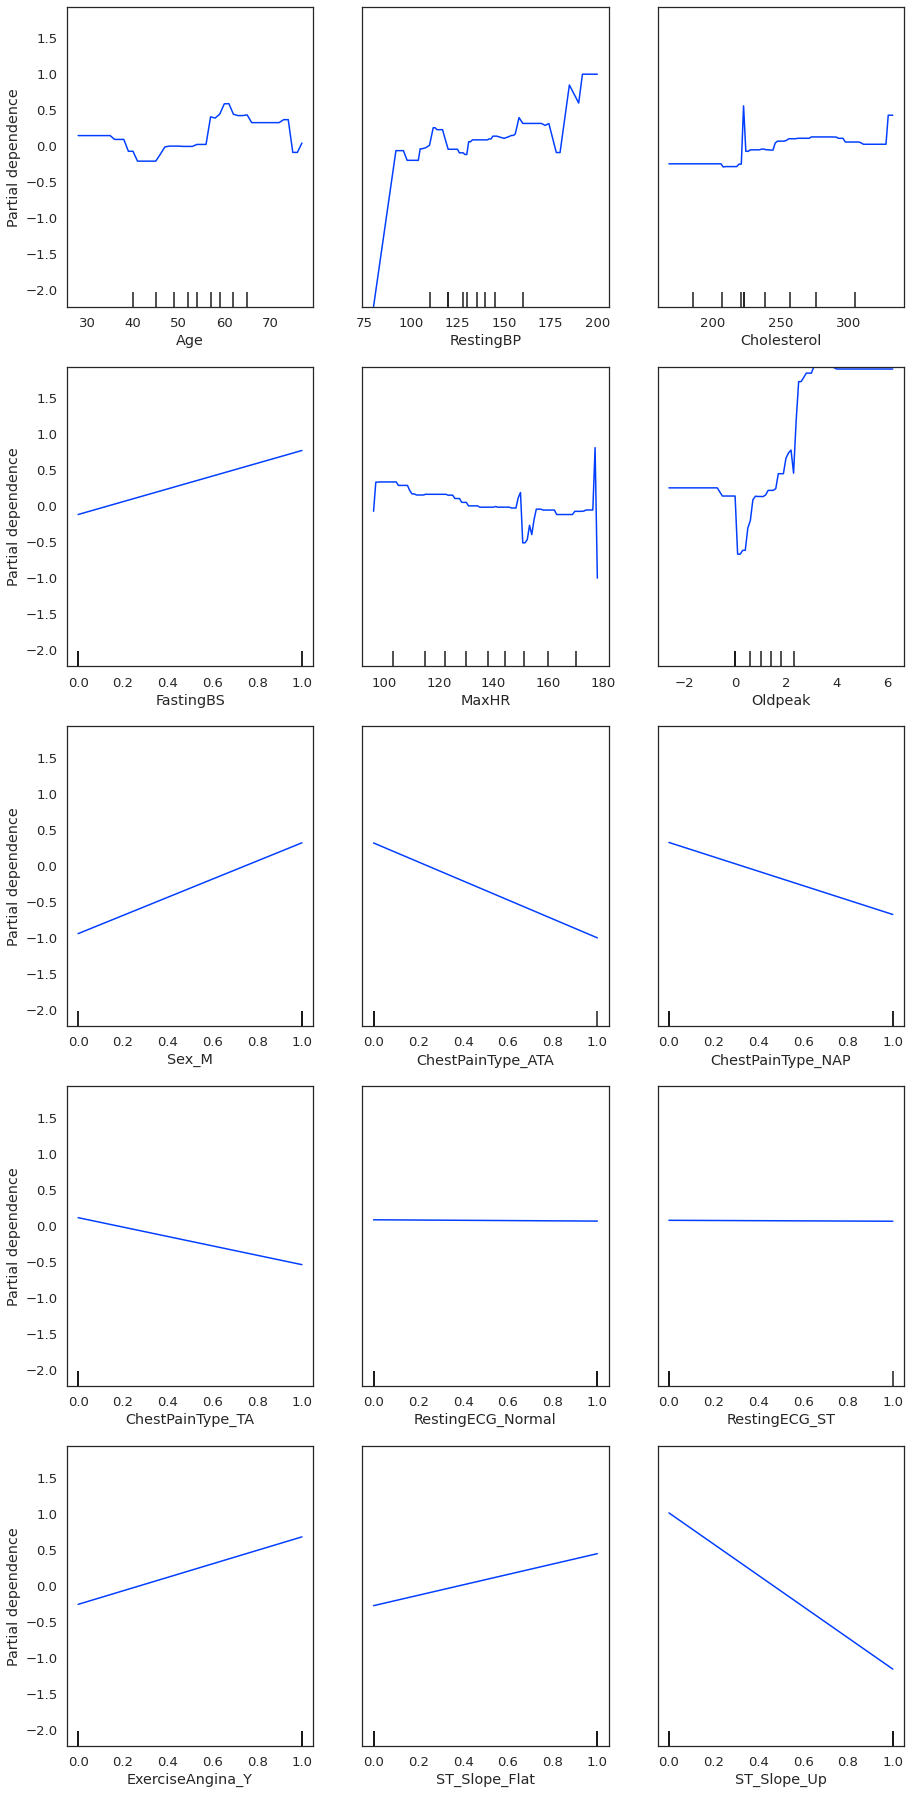

<Figure size 1080x2304 with 16 Axes>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import plot_partial_dependence

clf = GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)
sns.set(font_scale=1.2)
sns.set_style("white")
sns.set_palette("bright")
fig,ax = plt.subplots(figsize=(15,32))
plot_partial_dependence(clf, X_train, all_cols, ax=ax)

<span style="color:Blue"> **Observation:**
* As the value of the ST_Slope_Up feature increases, the case of heart disease becomes smaller.
* If the value of OldPeak is greater than 0, the judgment of heart disease increases. And, the slope is large.

<hr style="border: solid 3px white;">

## Feature importance based on mean decrease in impurity

After calculating the sum of the decrease of impurity at the point of splitting based on the corresponding feature in each tree, this
Mean decrease Gini is the average of all tree values. This value will increase as the feature becomes important for the model to classify well.

In [ ]:
importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_], axis=0)

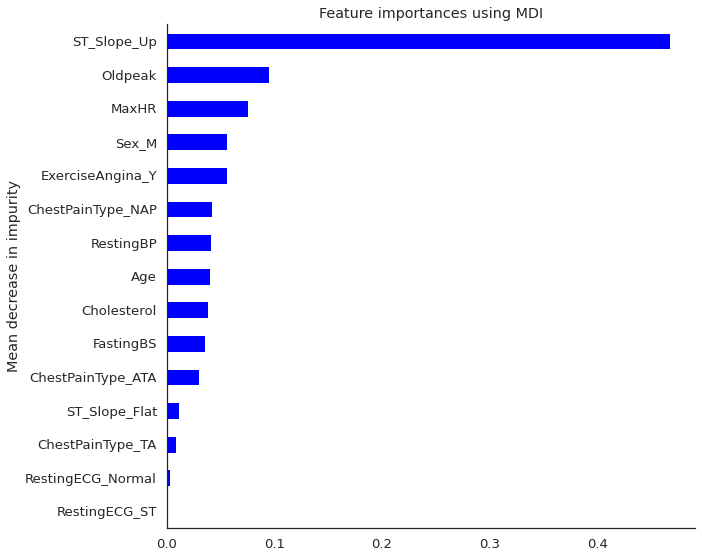

<Figure size 720x576 with 1 Axes>

In [ ]:
forest_importances = pd.Series(importances, index=all_cols)
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(10,8))
forest_importances.sort_values().plot.barh(yerr=std, ax=ax, color='blue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<hr style="border: solid 3px white;">

# Feature importance based on feature permutation

> The estimator is required to be a fitted estimator. X can be the data set used to train the estimator or a hold-out set. The permutation importance of a feature is calculated as follows. First, a baseline metric, defined by scoring, is evaluated on a (potentially different) dataset defined by the X. Next, a feature column from the validation set is permuted and the metric is evaluated again. The permutation importance is defined to be the difference between the baseline metric and metric from permutating the feature column.

Ref: https://scikit-learn.org/stable

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    clf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=all_cols)

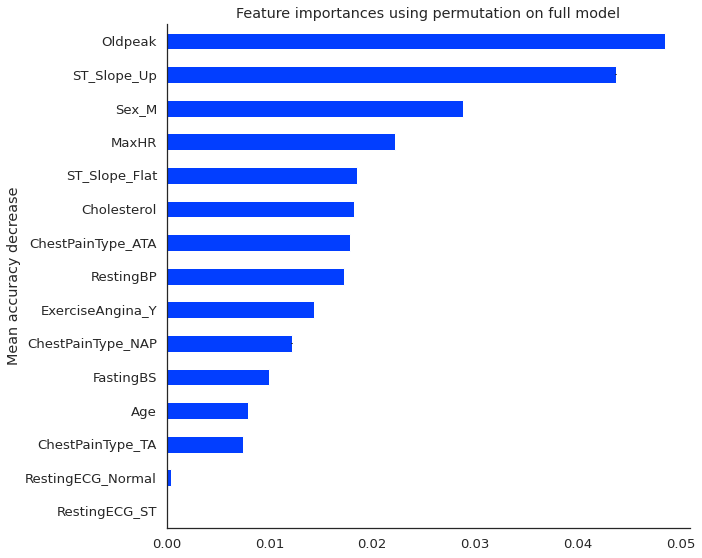

<Figure size 720x576 with 1 Axes>

In [ ]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(10,8))
forest_importances.sort_values().plot.barh(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.show()

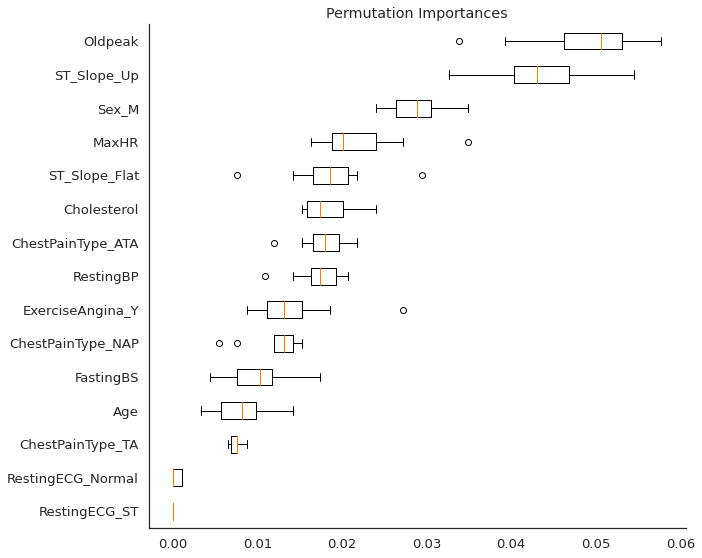

<Figure size 720x576 with 1 Axes>

In [ ]:
sorted_idx = result.importances_mean.argsort()
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(10,8))
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx]
)
ax.set_title("Permutation Importances")
fig.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

<hr style="border: solid 3px white;">


# Visualizing Training Dataset after Dimension Reduction
The preprocessed training dataset is 15 dimensions. After reducing the dimensions to 2D and 3D, let's check the distribution for each price.

## Plotting after dimensionality reduction to 2D

<AxesSubplot:>

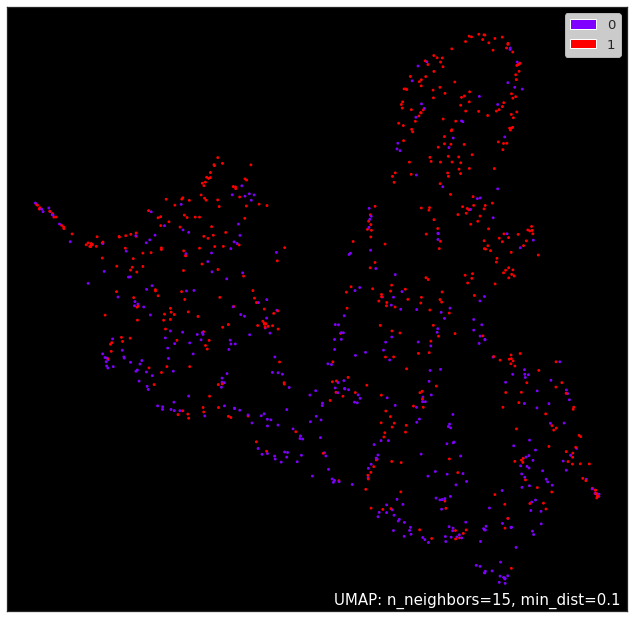

<Figure size 800x800 with 1 Axes>

In [ ]:
import umap
import umap.plot
mapper = umap.UMAP().fit(X_train)
umap.plot.points(mapper, labels=y_train, theme='fire')

<hr style="border: solid 3px white;">


# Modeling

> Supervised learning algorithms perform the task of searching through a hypothesis space to find a suitable hypothesis that will make good predictions with a particular problem.Even if the hypothesis space contains hypotheses that are very well-suited for a particular problem, it may be very difficult to find a good one. Ensembles combine multiple hypotheses to form a (hopefully) better hypothesis. The term ensemble is usually reserved for methods that generate multiple hypotheses using the same base learner. The broader term of multiple classifier systems also covers hybridization of hypotheses that are not induced by the same base learner.

For the final diagnosis of a certain patient, you can make a judgment by collecting opinions of several doctors. In this case, more accurate results can be obtained than the results judged by a single, outstanding doctor. It can be called the power of collective intelligence.

Ref: https://en.wikipedia.org/wiki/Ensemble_learning

In [ ]:
from pycaret.classification import *

<hr style="border: solid 3px white;">

# Setting Up

> This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes two mandatory parameters: data and target. All the other parameters are optional.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [ ]:
setup(data = heart_df,
      target = 'HeartDisease',
      preprocess = False,
      numeric_features = all_cols,
      verbose = False,
      silent = True)

({'parameter': 'Hyperparameters',
  'auc': 'AUC',
  'confusion_matrix': 'Confusion Matrix',
  'threshold': 'Threshold',
  'pr': 'Precision Recall',
  'error': 'Prediction Error',
  'class_report': 'Class Report',
  'rfe': 'Feature Selection',
  'learning': 'Learning Curve',
  'manifold': 'Manifold Learning',
  'calibration': 'Calibration Curve',
  'vc': 'Validation Curve',
  'dimension': 'Dimensions',
  'feature': 'Feature Importance',
  'feature_all': 'Feature Importance (All)',
  'boundary': 'Decision Boundary',
  'lift': 'Lift Chart',
  'gain': 'Gain Chart',
  'tree': 'Decision Tree',
  'ks': 'KS Statistic Plot'},
 'box-cox',
 StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
 True,
 -1,
       Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_M  \
 781  50.0      110.0        254.0        0.0  159.0      0.0    0.0   
 378  70.0      140.0        223.0        1.0  157.0      2.0    1.0   
 916  57.0      130.0        236.0        0.0  174.0      0.0    0.0  

<hr style="border: solid 3px white;">

## Comparing Models

> This function trains and evaluates performance of all estimators available in the model library using cross validation. The output of this function is a score grid with average cross validated scores.

In [ ]:
top5 = compare_models(sort='Recall',n_select = 5,exclude=['ridge','svm','dummy','knn','qda','ada','xgboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8674,0.9093,0.9077,0.8659,0.8851,0.7283,0.7325,0.2710
gbc,Gradient Boosting Classifier,0.8643,0.9206,0.9025,0.8700,0.8839,0.7209,0.7260,0.0520
rf,Random Forest Classifier,0.8534,0.9125,0.8967,0.8525,0.8730,0.6997,0.7033,0.3060
catboost,CatBoost Classifier,0.8565,0.9187,0.8941,0.8605,0.8755,0.7062,0.7101,1.2030
lr,Logistic Regression,0.8534,0.9120,0.8912,0.8578,0.8730,0.6997,0.7030,0.5110
lda,Linear Discriminant Analysis,0.8472,0.9117,0.8829,0.8539,0.8671,0.6874,0.6901,0.0090
lightgbm,Light Gradient Boosting Machine,0.8503,0.9093,0.8718,0.8697,0.8689,0.6942,0.6982,0.1050
nb,Naive Bayes,0.8488,0.9120,0.8663,0.8666,0.8658,0.6925,0.6937,0.0090
dt,Decision Tree Classifier,0.7413,0.7377,0.7687,0.7709,0.7688,0.4749,0.4766,0.0110


<hr style="border: solid 3px white;">

## Creating Models

> This function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a score grid with CV scores by fold.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [ ]:
et = create_model('et',verbose = False)
rf = create_model('rf',verbose = False)
lightgbm = create_model('lightgbm',verbose = False)
gbc = create_model('gbc',verbose = False)
catboost = create_model('catboost',verbose = False)
dt = create_model('dt',verbose = False)

<hr style="border: solid 3px white;">

## Interpreting Models

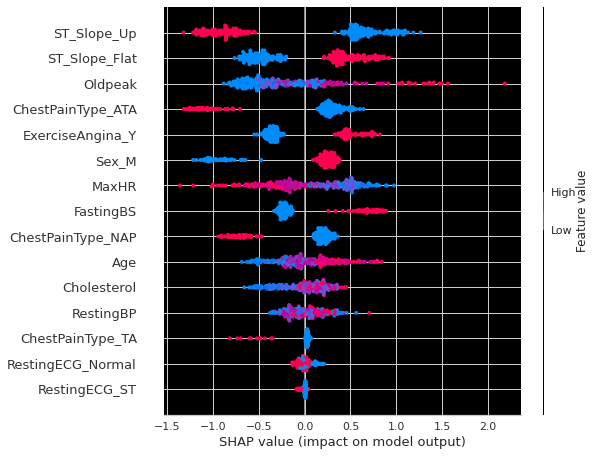

<Figure size 576x540 with 2 Axes>

In [ ]:
with plt.rc_context({'axes.facecolor':'black'}):
    interpret_model(catboost)

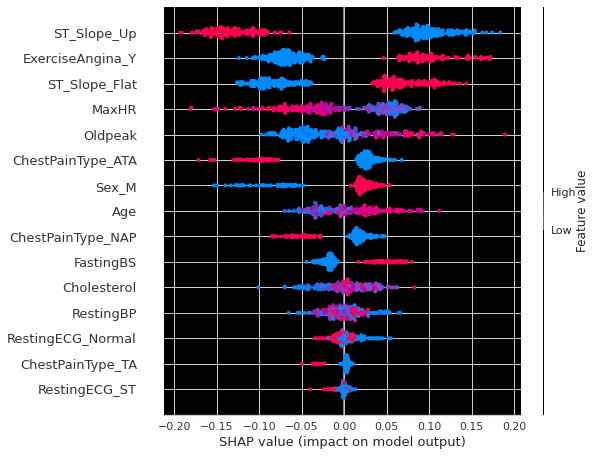

<Figure size 576x540 with 2 Axes>

In [ ]:
with plt.rc_context({'axes.facecolor':'black'}):
    interpret_model(rf)

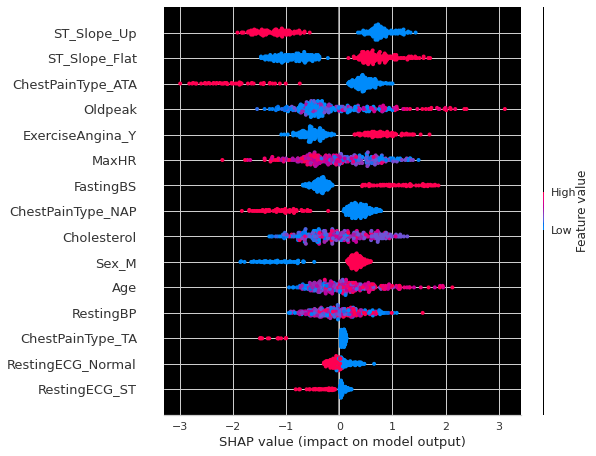

<Figure size 576x540 with 2 Axes>

In [ ]:
with plt.rc_context({'axes.facecolor':'black'}):
    interpret_model(lightgbm)

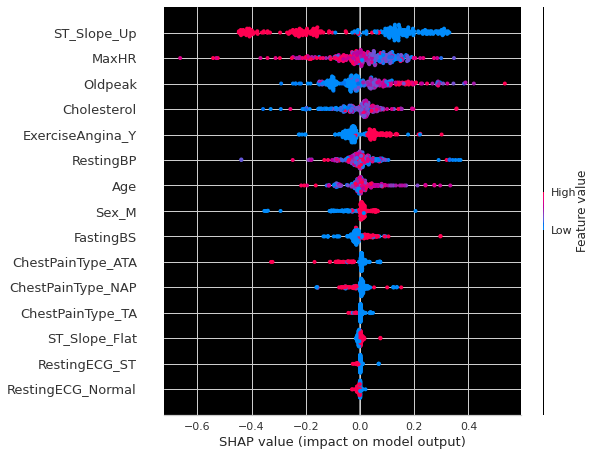

<Figure size 576x540 with 2 Axes>

In [ ]:
with plt.rc_context({'axes.facecolor':'black'}):
    interpret_model(dt)

<span style="color:Blue"> **Observation:**
* ST_Slope_Up feature is used as the most important feature in all models.
* ExerciseAngina_Y, ST_Slope_Up, and Oldpeak feature are used as an important feature in most models.
* RestingECG_ST features have the lowest importance in all models.   

Let's compare the feature importance of the above two models. A comparison was made with SHAP values, and the feature importance of each model is slightly different.
The diversity of each model seems to be stable and improve performance while compensating for each other's weaknesses.

<hr style="border: solid 3px white;">

## Tuning Hyperparameters

> This function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize parameter.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [ ]:
tuned_xgboost = tune_model(et, optimize = 'Recall',verbose = False)
tuned_rf = tune_model(rf, optimize = 'Recall',verbose = False)
tuned_lightgbm = tune_model(lightgbm, optimize = 'Recall',verbose = False)
tuned_gbc = tune_model(gbc, optimize = 'Recall',verbose = False)
tuned_catboost = tune_model(catboost, optimize = 'Recall',verbose = False)
tuned_dt = tune_model(dt, optimize = 'auc',verbose = False)

[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 

<Figure size 576x576 with 0 Axes>

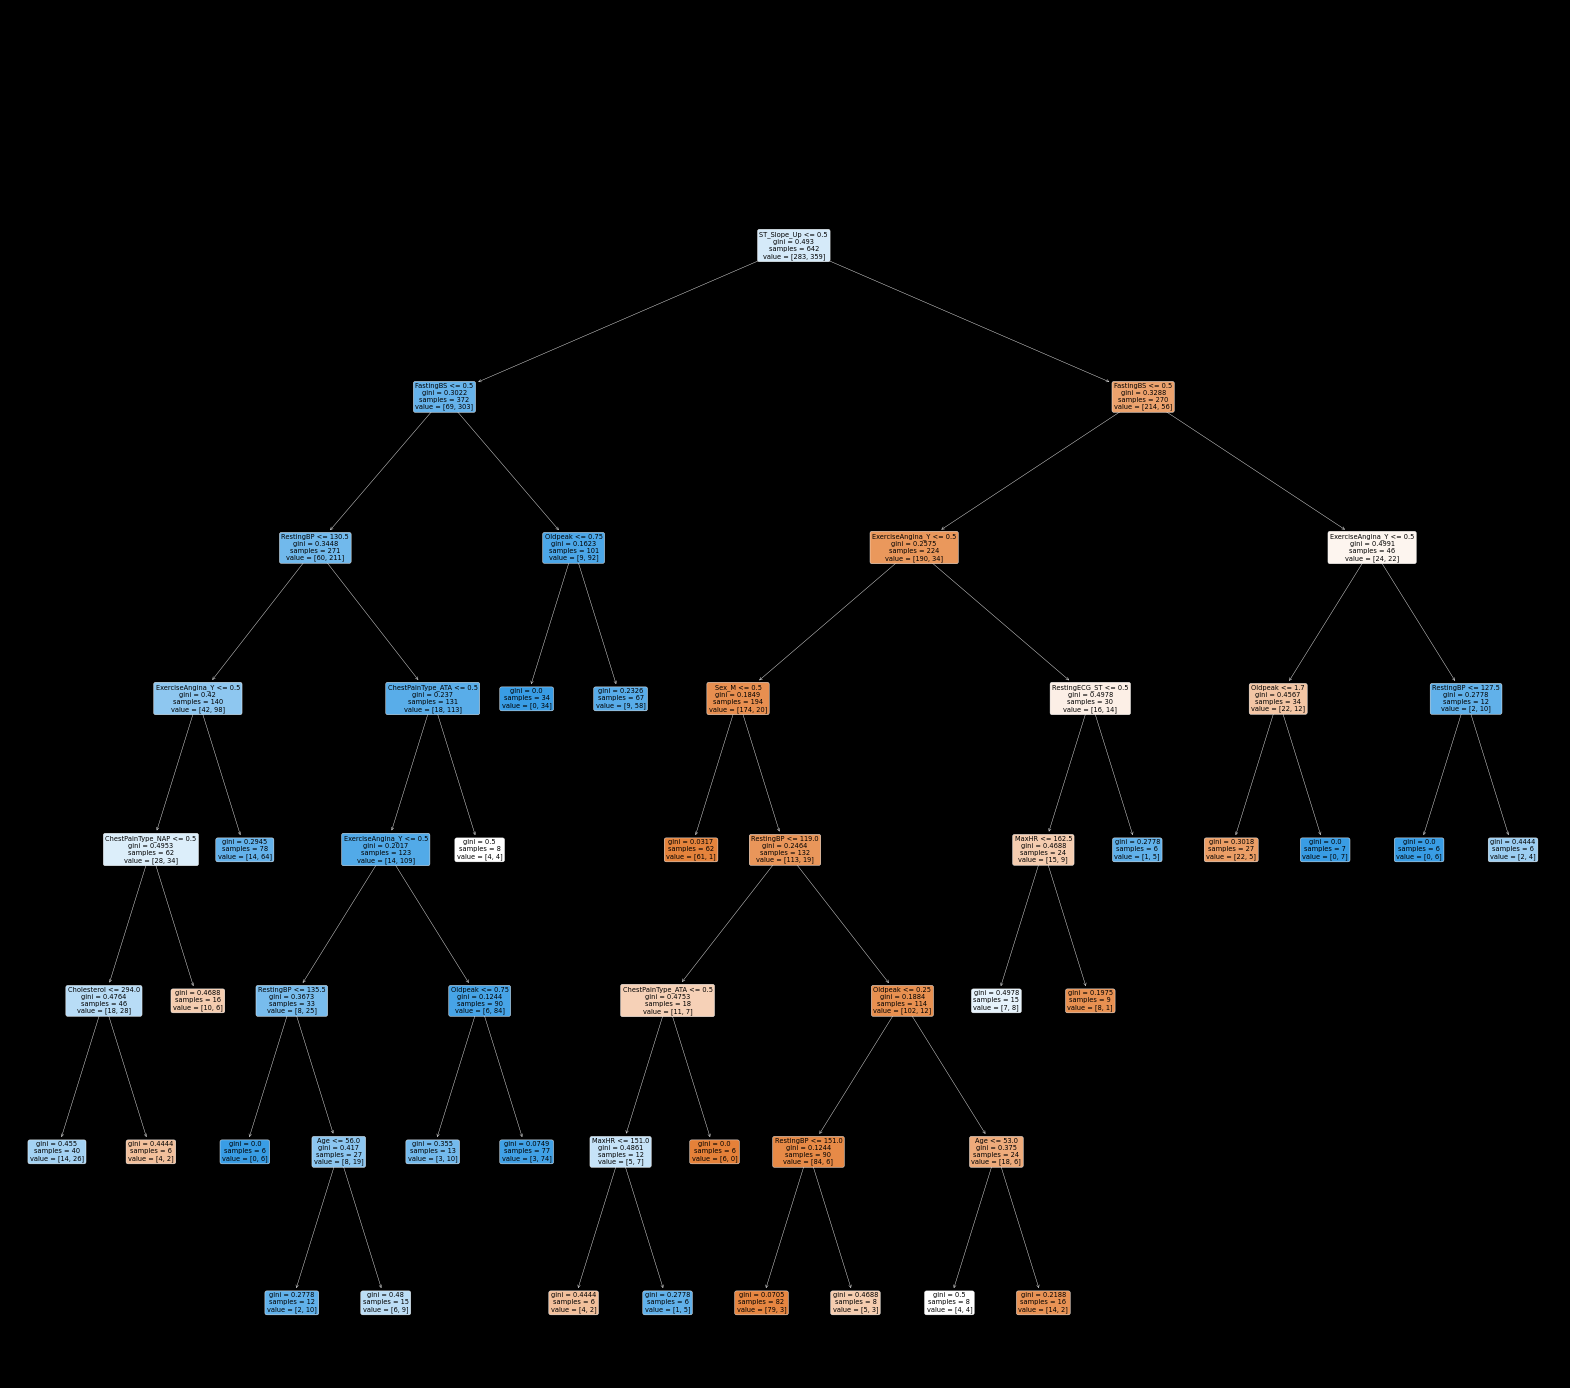

<Figure size 2000x1600 with 1 Axes>

In [ ]:
plt.figure(figsize=(8, 8))
with plt.rc_context({'figure.facecolor':'black','text.color':'black'}):
    plot_model(tuned_dt, plot='tree')

<span style="color:Blue"> **Observation:**

* The greater the feature importance, the earlier the separation.

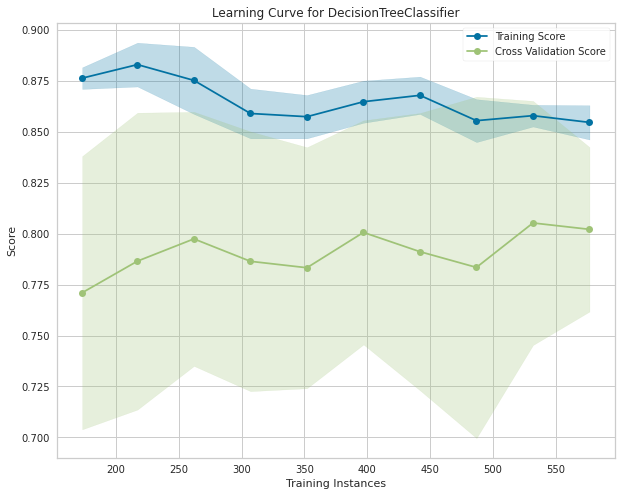

<Figure size 720x576 with 1 Axes>

In [ ]:
plt.figure(figsize=(10, 8))
plot_model(tuned_dt, plot='learning')

<hr style="border: solid 3px white;">

## Stacking

![](https://i.pinimg.com/originals/ed/d8/87/edd8873400deea9625ee67b37377d077.jpg)

Picture Credit: https://miro.medium.com

In [ ]:
stack_model = stack_models(estimator_list = [et,rf,lightgbm,gbc,catboost], meta_model = catboost,optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9077,0.9569,0.9167,0.9167,0.9167,0.8132,0.8132
1,0.9231,0.9674,0.9722,0.8974,0.9333,0.8428,0.8465
2,0.9531,0.9831,0.9444,0.9714,0.9577,0.9051,0.9056
3,0.7812,0.8323,0.9167,0.7500,0.8250,0.5410,0.5606
4,0.9219,0.9752,0.9167,0.9429,0.9296,0.8419,0.8423
5,0.8750,0.8948,0.9167,0.8684,0.8919,0.7440,0.7455
6,0.9062,0.9514,0.9444,0.8947,0.9189,0.8080,0.8097
7,0.7969,0.8829,0.8611,0.7949,0.8267,0.5823,0.5851
8,0.8125,0.8740,0.9444,0.7727,0.8500,0.6066,0.6286
9,0.8281,0.8562,0.8571,0.8333,0.8451,0.6522,0.6525


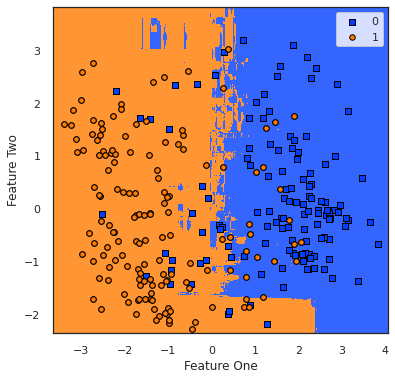

<Figure size 432x432 with 1 Axes>

In [ ]:
sns.set(font_scale=1)
sns.set_style("white")
sns.set_palette("bright")
plt.figure(figsize=(6, 6))
plot_model(stack_model, plot='boundary')

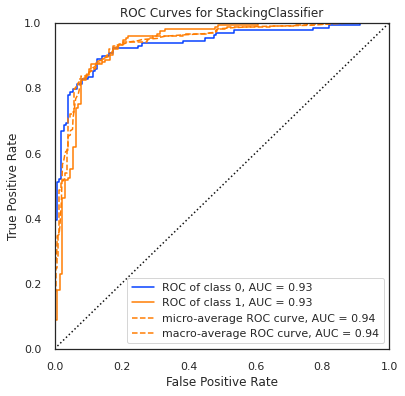

<Figure size 432x432 with 1 Axes>

In [ ]:
sns.set(font_scale=1)
sns.set_style("white")
sns.set_palette("bright")
plt.figure(figsize=(6, 6))
plot_model(stack_model, plot = 'auc')

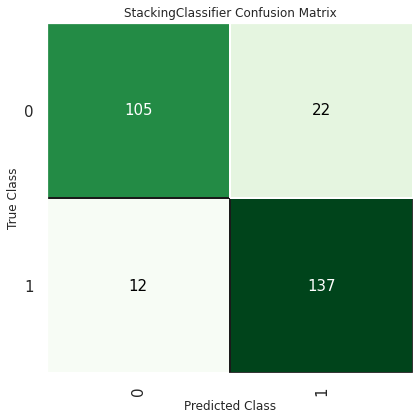

<Figure size 432x432 with 1 Axes>

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(6, 6))
plot_model(stack_model, plot='confusion_matrix')

<hr style="border: solid 3px white;">

## Soft Voting

![](https://miro.medium.com/max/806/1*bliKQZGPccS7ho9Zo6uC7A.jpeg)

Picture Credit: https://miro.medium.com

> This function trains a Soft Voting classifier for select models passed in the estimator_list param. The output of this function is a score grid with CV scores by fold.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [ ]:
blend_soft = blend_models(estimator_list = [et,rf,lightgbm,gbc,catboost], optimize = 'Recall',method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9231,0.9741,0.8889,0.9697,0.9275,0.8459,0.8495
1,0.9538,0.9732,0.9722,0.9459,0.9589,0.9063,0.9067
2,0.9219,0.9831,0.8889,0.9697,0.9275,0.8431,0.8469
3,0.7656,0.8373,0.8889,0.7442,0.8101,0.5102,0.5241
4,0.9062,0.9792,0.8889,0.9412,0.9143,0.8110,0.8126
5,0.8281,0.8849,0.8611,0.8378,0.8493,0.6494,0.6497
6,0.8906,0.9444,0.9167,0.8919,0.9041,0.7769,0.7773
7,0.7969,0.8681,0.8611,0.7949,0.8267,0.5823,0.5851
8,0.7812,0.8859,0.9167,0.7500,0.8250,0.5410,0.5606
9,0.8281,0.8700,0.8571,0.8333,0.8451,0.6522,0.6525


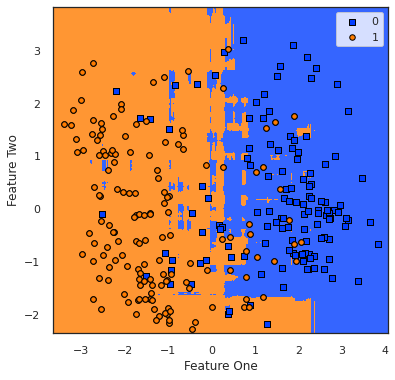

<Figure size 432x432 with 1 Axes>

In [ ]:
sns.set_style("white")
sns.set_palette("bright")
plt.figure(figsize=(6, 6))
plot_model(blend_soft, plot='boundary')

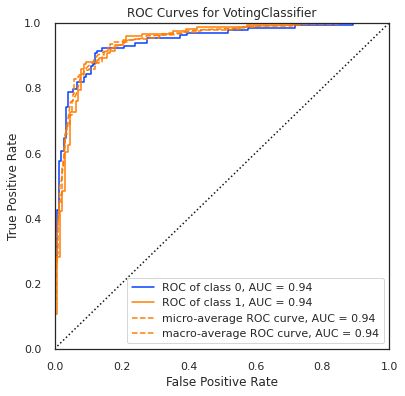

<Figure size 432x432 with 1 Axes>

In [ ]:
sns.set_style("white")
sns.set_palette("bright")
plt.figure(figsize=(6, 6))
plot_model(blend_soft, plot = 'auc')

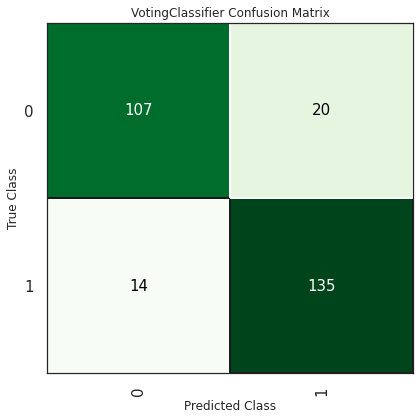

<Figure size 432x432 with 1 Axes>

In [ ]:
plt.figure(figsize=(6, 6))
plot_model(blend_soft, plot='confusion_matrix')

<hr style="border: solid 3px white;">

## Hard Voting

![](https://miro.medium.com/max/428/1*XnZwlg7Th3nga25sSlanJQ.jpeg)

Picture Credit: https://vitalflux.com


> This function trains a **Majority Rule classifier** for select models passed in the estimator_list param. The output of this function is a score grid with CV scores by fold.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [ ]:
blend_hard = blend_models(estimator_list = [et,rf,lightgbm,gbc,catboost], optimize = 'Recall',method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8923,0.0000,0.8611,0.9394,0.8986,0.7843,0.7876
1,0.9385,0.0000,0.9722,0.9211,0.9459,0.8746,0.8764
2,0.9219,0.0000,0.8889,0.9697,0.9275,0.8431,0.8469
3,0.7656,0.0000,0.8611,0.7561,0.8052,0.5142,0.5210
4,0.9531,0.0000,0.9444,0.9714,0.9577,0.9051,0.9056
5,0.8125,0.0000,0.8611,0.8158,0.8378,0.6160,0.6173
6,0.9062,0.0000,0.9444,0.8947,0.9189,0.8080,0.8097
7,0.8281,0.0000,0.8889,0.8205,0.8533,0.6466,0.6496
8,0.7812,0.0000,0.9167,0.7500,0.8250,0.5410,0.5606
9,0.8281,0.0000,0.8571,0.8333,0.8451,0.6522,0.6525


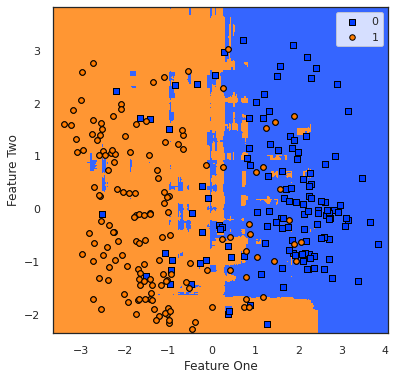

<Figure size 432x432 with 1 Axes>

In [ ]:
plt.figure(figsize=(6, 6))
plot_model(blend_hard, plot='boundary')

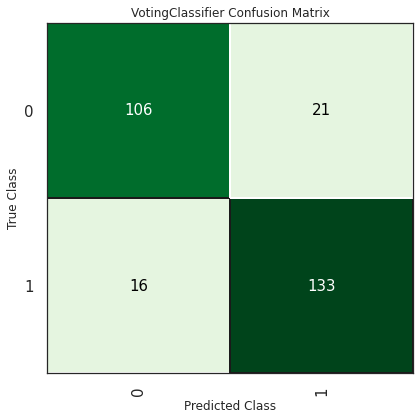

<Figure size 432x432 with 1 Axes>

In [ ]:
plt.figure(figsize=(6, 6))
plot_model(blend_hard, plot='confusion_matrix')

<hr style="border: solid 3px white;">

## Calibrating the final model
> This function calibrates the probability of a given estimator using isotonic or logistic regression.

When judging the performance of the above three ensemble models by recall, the soft voting model has the best performance. Therefore, the soft voting model is selected as the final model and calibration is performed.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [ ]:
cali_model = calibrate_model(blend_soft)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8769,0.9703,0.8333,0.9375,0.8824,0.7543,0.7600
1,0.9538,0.9732,0.9722,0.9459,0.9589,0.9063,0.9067
2,0.9219,0.9762,0.8889,0.9697,0.9275,0.8431,0.8469
3,0.7656,0.8373,0.8889,0.7442,0.8101,0.5102,0.5241
4,0.9219,0.9821,0.9167,0.9429,0.9296,0.8419,0.8423
5,0.8438,0.8859,0.8889,0.8421,0.8649,0.6800,0.6814
6,0.8906,0.9415,0.9167,0.8919,0.9041,0.7769,0.7773
7,0.8125,0.8661,0.8611,0.8158,0.8378,0.6160,0.6173
8,0.7812,0.8790,0.9167,0.7500,0.8250,0.5410,0.5606
9,0.8281,0.8729,0.8571,0.8333,0.8451,0.6522,0.6525


<span style="color:Blue"> **Observation:**
* The recall of the model completed until calibration is over 90%.

<hr style="border: solid 3px white;">

## Finalizing the last model
> This function trains a given estimator on the entire dataset including the holdout set.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [ ]:
final_model = finalize_model(cali_model)

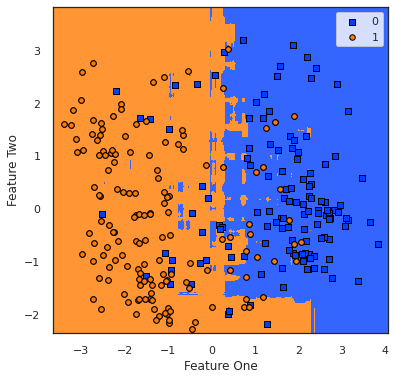

<Figure size 432x432 with 1 Axes>

In [ ]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='boundary')

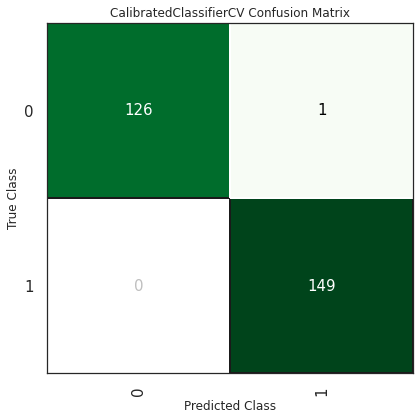

<Figure size 432x432 with 1 Axes>

In [ ]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='confusion_matrix')